<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**주성분 분석-차원 분석**

식습관 데이터를 1차원 데이터로 차원축소 시켜 시각화를 목적으로 한다.

In [1]:
#데이터 생성

import pandas as pd
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [2]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
#가공 데이터 확인
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


**데이터 전처리**

df에는 데이터 특징과 클래스가 함께 구성되었으므로, class( body_shape ) 가 제외된 X 데이터를 만든다.

In [4]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


**표준화**

타 데이터값에 비해 calory의 수치가 크다. 따라서 더욱 효율적인 머신러닝 처리를 위해, 모든 특성들을 *평균 0 표준편차가 1인 데이터로 바꾼다.*

In [5]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [6]:
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


각 데이터 특성에 따른 체형(label)을 따로 데이터 프레임으로 생성한다.

In [7]:
Y = df [['body_shape']]

In [10]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


주성분 분석을 하기 위해 우선적으로 특징들의 *공분산 행렬*을 구한다.

In [11]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

In [12]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


**고윳값 eigen value 과 고유벡터 eigen vector 구하기**

데이터의 손실을 최소한으로 하는 1차원으로 차원 축소를 하기 위해, 공분산 행렬에서 가장 큰 고윳값을 가진 고유벡터를 찾아 그 벡터 위에 데이터들을 사영시킨다.

In [13]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [14]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [15]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [16]:
#사영x, [0]이 전체 분산에서 차지하는 비율 확인
#사영할 경우에도 해당 값만큼의 정보가 유지된다.

eig_vals[0] / sum(eig_vals)

0.7318321731427544

**5차원 데이터를 고유벡터로 사영**

A벡터를 B벡터로 사영할 때의 공식: dot(A, B)/Magnitude(B)


In [18]:
projected_X = x_std.dot(eig_vecs.T[0] / np.linalg.norm(eig_vecs.T[0]))

In [19]:
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

**시각화**


y축 값을 0으로 고정시키고, projected_X 1차원 데이터를 x축에 둔다.

In [26]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [27]:
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

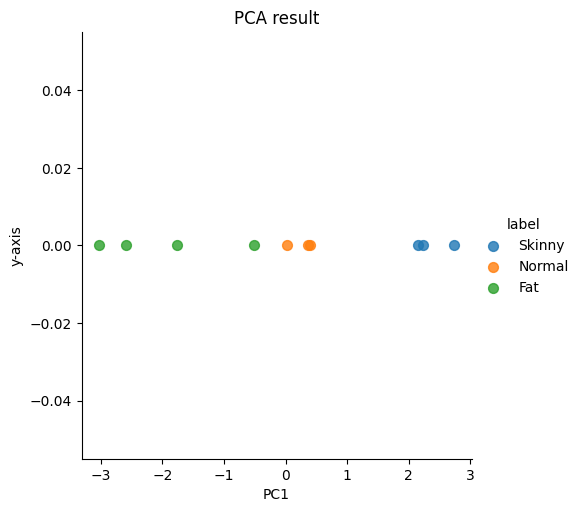

In [28]:
# 1차원 데이터를 2차원 차트에서 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, scatter_kws={"s": 50},
           hue='label')
plt.title('PCA result')

**사이킷런을 통한 주성분 분석(차원축소) 간단 구현**

정규화환 5차원 벡터(x_std)를 1차원으로 변환

In [29]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

Text(0.5, 1.0, 'PCA result')

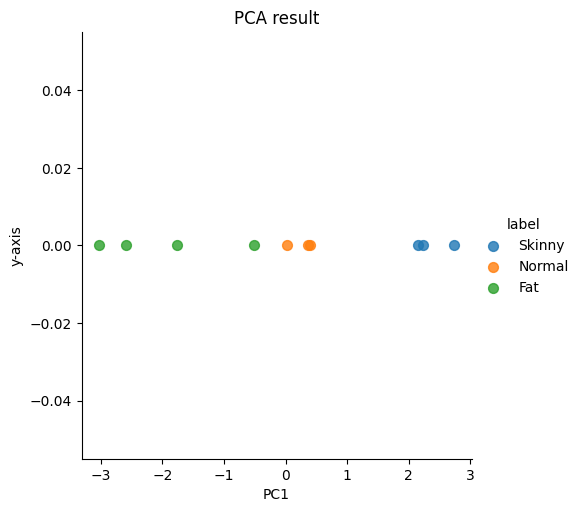

In [31]:
#시각화
sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['PC1'])
sklearn_result['y_axis'] = 0.0
sklearn_result['label'] = Y
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, scatter_kws={"s": 50},
           hue='label')
plt.title('PCA result')